In [2]:
import numpy as np
from tensorflow import keras
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [4]:
# Load Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# Flatten images
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Baseline Model (Without PCA)
model = keras.models.Sequential([
    keras.layers.Dense(128, activation="relu", input_shape=(784,)),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.fit(X_train_flat, y_train, epochs=10, batch_size=128)
baseline_acc = model.evaluate(X_test_flat, y_test)

# Apply PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

# Select optimal n_components
pca = PCA().fit(X_train_scaled)
explained_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variance >= 0.95) + 1
print(f"Optimal n_components: {n_components}")

# Apply PCA with selected components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Model with PCA
model_pca = keras.models.Sequential([
    keras.layers.Dense(128, activation="relu", input_shape=(n_components,)),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model_pca.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model_pca.fit(X_train_pca, y_train, epochs=10, batch_size=128, verbose=1, validation_data=(X_test_pca, y_test))
pca_acc = model_pca.evaluate(X_test_pca, y_test, verbose=0)[1]

# Results
print(f"Baseline Accuracy: {baseline_acc[1]:.4f}")
print(f"PCA Accuracy: {pca_acc:.4f}")

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7431 - loss: 0.7441
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8582 - loss: 0.3984
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8738 - loss: 0.3504
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8830 - loss: 0.3182
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8876 - loss: 0.3047
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8918 - loss: 0.2880
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8977 - loss: 0.2771
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9024 - loss: 0.2646
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9063 - loss: 0.2503
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9075 - loss: 0.2476
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8686 - loss: 0.3939
Optimal n_components: 256
Epoch 1/10


c:\Users\Rushabh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7371 - loss: 0.8050 - val_accuracy: 0.8632 - val_loss: 0.3921
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8848 - loss: 0.3181 - val_accuracy: 0.8748 - val_loss: 0.3576
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9011 - loss: 0.2760 - val_accuracy: 0.8774 - val_loss: 0.3508
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9133 - loss: 0.2415 - val_accuracy: 0.8799 - val_loss: 0.3548
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9194 - loss: 0.2177 - val_accuracy: 0.8798 - val_loss: 0.3387
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9290 - loss: 0.1948 - val_accuracy: 0.8832 - val_loss: 0.3508
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9373 - loss: 0.1771 - val_accuracy: 0.8851 - val_loss: 0.3523
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9418 - loss: 0.1623 - val_accuracy: 0.8858 - val_

Clustering Accuracy: 0.8333


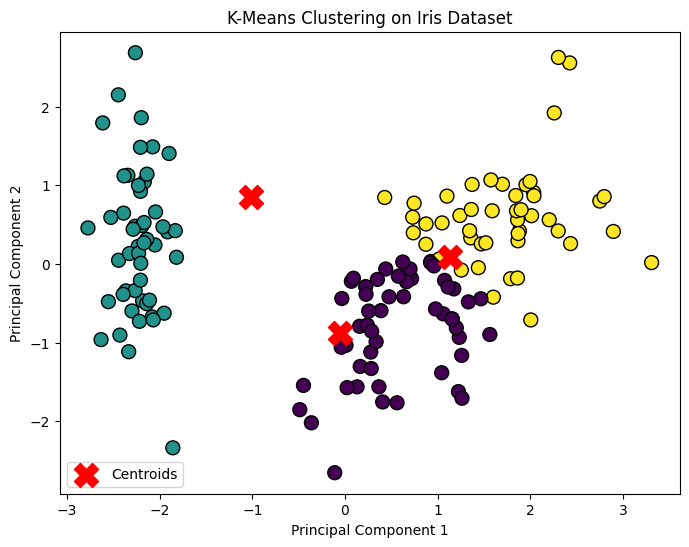

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from scipy.stats import mode

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target  # True labels

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)

# Adjust cluster labels to match true labels
def match_labels(y_true, y_pred):
    labels = np.zeros_like(y_pred)
    for i in range(k):
        mask = (y_pred == i)
        labels[mask] = mode(y_true[mask])[0]
    return labels

y_kmeans_adjusted = match_labels(y, y_kmeans)

# Compute accuracy
accuracy = accuracy_score(y, y_kmeans_adjusted)
print(f"Clustering Accuracy: {accuracy:.4f}")

# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot K-Means Clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', edgecolors='k', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label="Centroids")
plt.title("K-Means Clustering on Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()
